In [1]:
# Importing Dependencies
import pandas as pd
import re
import matplotlib.pyplot as plt

# **EDA Analysis**
## Ticket 1.1: Continued
### Data Ingestion


In [2]:
# Load the data
job_postings = pd.read_csv('../../../../data/job_postings.csv')

display("Job Postings Dataset:")
display(job_postings.head())

'Job Postings Dataset:'

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite


### Industry Spread and Keyword Analysis


In [3]:
# Broad Industry Keywords in Regex
industry_keywords = {
    "healthcare": r"(?i)(Bio|Medical|Pharma|Clinical|Hospital|Health|Nursing|Biotech|Wellness)\w*[-\s]?",                       # using (?i) to make capitalization insensitive
    "finance": r"(?i)(Quant|Trading|Risk|Bank|Invest|Wealth|Asset|Markets|Capital)\w*[-\s]?",                                   # using \w* to allow for any additional words or characters
    "business": r"(?i)(Business|Consulting|Strategy|BI|Analytics|Management|Operations|Process)\w*[-\s]?",                      # using [-\s]? to allow for any additional words or characters
    "marketing": r"(?i)(Market|Advert|Customer|Brand|AdTech|E-?Comm|Commerce)\w*[-\s]?",
    "supply_chain": r"(?i)(Logist|Supply|Procure|Fleet|Transport|Demand|Forecast|Predict)\w*[-\s]?",
    "energy": r"(?i)(Energy|Oil|Gas|Power|Electric|Sustain|Climate|Carbon)\w*[-\s]?",
    "government": r"(?i)(Govern|Policy|Regulat|Law|Legis|Civic)\w*[-\s]?",
    "security": r"(?i)(Cyber|Threat|Risk Assess|Anomaly Detect)\w*[-\s]?",
    "tech": r"(?i)(AI|ML|Data|Cloud|Software|IT|Engineering|MLOps|Deep Learn|Computer Vision|Text|Speech Recogn)\w*[-\s]?",
    "research": r"(?i)(Academic|University|Education|Postdoc|Research)\w*[-\s]?"
}

In [4]:
# Function to Classify Job Postings by Industry(default)
def classify(job_title, keywords_list=industry_keywords):
    for industry, keyword in keywords_list.items():
        match = re.search(keyword, str(job_title))
        if match:
            keyword = re.sub(r'[^a-zA-Z\s]', '', match.group()).strip().title()   # using match.group() to return the actual keyword that was matched rather than the regex pattern
            return industry, keyword              
    return "unclassified", "unclassified"


In [5]:
# apply the function to a new table created from the job_postings dataset
keyword_classifications = job_postings.copy()
keyword_classifications['industry'], keyword_classifications['keyword'] = zip(*keyword_classifications['job_title'].apply(classify))

# display the first few rows of the new table
keyword_classifications.head()


,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,industry,keyword
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,unclassified,unclassified
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,tech,Software
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,tech,Data
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,tech,Data
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,tech,Data


'Industry Distribution in Job Postings:'

,count
industry,
business,1575
healthcare,847
unclassified,425
marketing,235
finance,230
government,112
energy,100
supply_chain,94
research,34


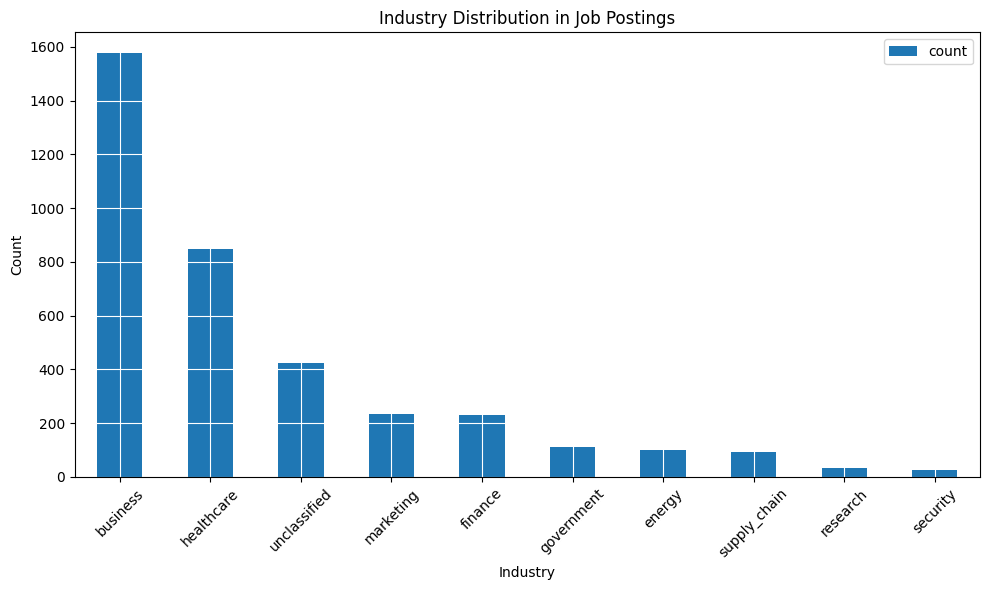

In [6]:
# count the number of each industry occurrence
industry_counts = pd.DataFrame(keyword_classifications['industry'].value_counts()).reset_index().set_index('industry')

# remove tech temporarily from the industry counts for readability as it skews results due to being a Data Science Focused Dataset
industry_counts = industry_counts[industry_counts.index != 'tech']

# display the counts
display("Industry Distribution in Job Postings:")
display(industry_counts)

# create a bar chart of the industry counts
industry_counts.plot(kind='bar', figsize=(10, 6))

# add labels and title
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Industry Distribution in Job Postings')
plt.xticks(rotation=45)
plt.grid(True, color='white')

# save figure
plt.savefig('../../../../resources/eda_1.1_industry_distribution_line.png')

# show the plot
plt.tight_layout()
plt.show()


#### **Reflection: Industry Categorization and Data Composition**  

With the majority of job titles successfully categorized and only **425 remaining unclassified**, the **keyword-based regex system proved to be highly effective** in grouping jobs by industry/ keywords. Additonally, given that the dataset was completely **data science-focused**, it's expected that many job postings fall within **Tech**, and subsequently the business, healthcare, and marketing sectors, where data-driven decision-making is heavily integrated.  

Looking at the industry-level distribution, there is **a clear skew towards generalist and tech-adjacent industries**, which aligns with the growing demand for data science applications across fields. However, **lower representation in niche industries like research and security** suggests that **granular discipline-based classifications** may not yield enough data for meaningful insights unless supplemented with external sources.  

A key consideration is **whether industry-level grouping provides enough depth or if a more specific discipline-based categorization (e.g., "Financial Data Analyst" vs. "Data Analyst") would be viable**. While there is a strong presence of job postings at the industry level, the **next step would be evaluating whether discipline-level segmentation (based on subfields of data science) maintains a large enough sample size** to support meaningful analysis.  


In [7]:
# count the number of each keyword occurrences
keyword_counts = pd.DataFrame(keyword_classifications['keyword'].value_counts()).reset_index().set_index('keyword')

# display the counts
display("Keyword Counts:")
display(keyword_counts)

'Keyword Counts:'

,count
keyword,
Data,6072
Database,626
Medical,488
unclassified,425
Analytics,358
...,...
Databrick,1
Datacoves,1
Lawyer,1


#### **Reflection: Refining Job Title and Skill Standardization**  

As we further analyze and explore the dataset to gauge our possibilities in the realm of **job title standardization** and its **relationship to skill mapping**, the scale of variation across industries and roles has become even more apparent. Initially, I assumed that **industry-based standardization**—namely, the idea to map skills to standardized job roles based on their respective industries—would be the most logical approach. My thought process was that this would prevent the **cross-contamination** of industry-specific skills and thus allow for a more accurate mapping of skills to specific job roles. However, the data shows that at the current data size, this method risks **fragmenting the dataset too much**, leaving niche roles with **too few data points to create meaningful insights**.  

Another idea which I heavily considered was a **dual-level mapping approach**, which would categorize skills at two levels:  
1. **Industry-based categorization** → Capturing specialized knowledge unique to each industry and job title.  
2. **Technical role categorization** → Grouping jobs by broader technical roles/titles (e.g., *AI Engineer*, *Data Analyst*) to **increase sample sizes** across industries and relate technical skills to certain data science roles.  

While this would strengthen the dataset’s usability, it would also **risk the grouping of unrelated or industry-specific skills together**, particularly in highly specialized fields. This would require classifying skills into **technical, soft, and industry-specific tiers** and then subsequently applying different processes to each skill based on its classification. However, implementing this system **may exceed the available time constraints** for this project.  

<br>
<br>
<br>
<br>
<br>
<br>

## **Keyword Frequency Analysis in Job Titles and Potential Adjustments**  

As I examined the **keyword occurrences within job titles**, terms like **"data" (6072 occurrences), "database" (626), "analytics" (358), "AI" (146), and "cloud" (87)** showed a strong presence, which was expected given the dataset’s focus on data-related roles. However, there is also a significant number of **niche or domain-specific terms** such as **"biostatistics" (10), "cybersecurity" (13), and "biopharma" (3)** that appear much less frequently.  This lack of representation in job titles could pose challenges in the **analysis and visualization stages**, as job titles with fewer than **5–10 occurrences** may not provide meaningful insights. At such low frequencies, **ranking skill importance or even establishing relevant skill relationships** becomes difficult, potentially leading to inactionable or misleading data.

This raises the question of **how to refine our job title standardization process** without over-generalizing or losing valuable distinctions. Some potential strategies include:  
- **Filtering out single-occurrence job titles** to remove excessive noise and outliers.  
- **Using interquartile range (IQR) or percentile-based cutoffs** to determine a threshold for low-frequency job titles.  
- **Grouping keywords dynamically** to align with how job titles naturally cluster—whether by technical skills, industry, or specialization.  

At this stage, I am still considering the best approach, but these initial findings highlight the need to **balance granularity with standardization** in job title classification.  

### **Current Exploration: Focusing on Technical Titles in Data Science**  

Given the continued **EDA** findings, one practical refinement could be **limiting the project’s scope to technical job titles** such as *Data Analyst*, *Data Engineer*, *Data Scientist*, *Machine Learning Engineer*, *Full-Stack Developer*, etc. This would simplify standardization by removing **industry-dependent or specific job roles** while ensuring the tool provides **actionable insights on technical data science skills demand**.  

By narrowing the scope in this way, we can **ensure a more structured and scalable approach to job title standardization** while avoiding excessive fragmentation. The next steps will involve **evaluating different filtering and keyword grouping methods** to determine the most effective way to process job title standardization while maintaining **meaningful role differentiation**.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Attempting to Standardize Job Titles by Technical Job Role/ Skill Expectations**


### **Keyword Process Notes**  

While working on job title standardization, I realized that **categorizing job titles by industry was not a consistent method** for standardization—especially considering that the end product needs to **relate skills within those categorizations/keywords**. At this stage of the project, had we categorized job titles by industry, career path, or job track, we would have introduced **cross-contamination of skills within the categorizations**. This would require either:  
- A **more complex skill-to-job/industry mapping process**, or  
- A **manual filtering process**, reviewing and removing industry-specific skills from each category.  

This led me to refine the idea of **standardizing job titles further by technical job roles and skill expectations** for career paths and progression. However, considering the scale of this task, it is **beyond our current skill level and time constraints**.  

At this stage, I believe it will be necessary to explore **light categorization work** to expand the relational database for each skill and job title. This would be coupled with **keyword-based job categorization** to directly relate skills within the **exact same job title** while maintaining clarity in skill-to-role relationships.

In [8]:
# technical job titles regex list

technical_job_titles = {
    # 🔹 **Most Specialized AI & ML Research Roles**
    "AI Research Scientist": r"(?i)(AI Research|Artificial Intelligence Research|AI Scientist|LLM|AGI|Foundation Model|Neural Network|AI Innovation|AI Ethics|AI/ML Research Scientist)\w*[-\s]?",
    "ML Research Scientist": r"(?i)(Machine Learning Research|ML Research|Deep Learning Research|NLP|Computer Vision Research|Generative AI|Speech Recognition|Bayesian Learning|ML Platform Engineer)\w*[-\s]?",
    "Quantitative Researcher": r"(?i)(Quant Research|Financial Modeling|Algorithmic Trading|Statistical Inference|Hedge Fund|Risk Modeling)\w*[-\s]?",

    # 🔹 **AI & ML Engineering**
    "Machine Learning Engineer": r"(?i)(Machine Learning Engineer|ML Engineer|ML Developer|NLP Engineer|Computer Vision Engineer|Reinforcement Learning|Machine Learning Software Developer|AI/ML Engineer)\w*[-\s]?",
    "AI/ML Algorithm Developer": r"(?i)(AI Algorithm|ML Algorithm|AI/ML Algorithm Developer|AI Compiler Engineer)\w*[-\s]?",
    "AI Systems Engineer": r"(?i)(AI Systems|Autonomous Systems|Embedded AI|AI Robotics|Self Driving|AI Accelerator|AI Research Engineer|AI/Machine Learning Architect)\w*[-\s]?",
    "MLOps Engineer": r"(?i)(MLOps|Model Deployment|ML Infrastructure|AI Ops|ML Systems|DataOps|ML Pipeline|Machine Learning Infrastructure Engineer|Machine Learning Operations|AI/ML Ops Engineer)\w*[-\s]?",

    # 🔹 **Software Engineering**
    "AI Software Engineer": r"(?i)(AI Software|ML Software|AI Developer|ML Developer|AI Application|Deep Learning Software Engineer|Machine Learning Software Engineer|Software Engineer - Data Science|Software Engineer - Data Platforms)\w*[-\s]?",
    "AI Platform Engineer": r"(?i)(AI Platform|AI Infrastructure|AI Tools|ML Platform|AI DevOps|ML Engineering|LLM Engineer)\w*[-\s]?",
    "Software Engineer": r"(?i)(Software Engineer|Software Developer|Full Stack Engineer|Backend Engineer|Frontend Engineer|Application Developer|Embedded Software Engineer|Systems Developer|Cloud Software Engineer)\w*[-\s]?",
    "DevOps Engineer": r"(?i)(DevOps Engineer|Site Reliability Engineer|SRE|Infrastructure Engineer|Automation Engineer|Build Engineer|Cloud DevOps Engineer)\w*[-\s]?",
    "Platform Engineer": r"(?i)(Platform Engineer|Infrastructure Engineer|Cloud Platform Engineer|Scalability Engineer|Software Operations Engineer)\w*[-\s]?",

    # 🔹 **Data Science & Analytics**
    "Business Data Scientist": r"(?i)(Business Data Scientist|Product Data Scientist|Marketing Data Scientist|Customer Data Scientist|Econometrics|Demand Forecasting|Financial Data Scientist|Healthcare Data Scientist)\w*[-\s]?",
    "Data Scientist": r"(?i)(Data Scientist|Applied Data Scientist|AI Applications|Decision Science|ML Analyst|AI Research Engineer|AI/ML Data Scientist|ML Engineer - Data Science|Data Science Researcher|Data Science Analyst|Data Science Engineer|Data Science Practitioner|Statistician Data Science)\w*[-\s]?",
    "Financial Data Analyst": r"(?i)(Financial Analyst|Investment Analyst|Risk Analyst|Actuary|Market Data|Economist|Trading Data|Quant Analyst)\w*[-\s]?",
    "Data Analyst": r"(?i)(Data Analyst|BI Analyst|Business Intelligence|Analytics|Visualization|Insights|Reporting|Data Operations Analyst|Financial Data Analyst|Data Validation Analyst|Data Insights Analyst|Data Business Analyst)\w*[-\s]?",
    
    # 🔹 **Data Architecture & Management**
    "Senior Data Architect": r"(?i)(Senior Data Architect|Lead Data Architect|Principal Data Architect|Data Engineering Architect|Enterprise Data Architect|AI/Machine Learning Architect)\w*[-\s]?",
    "Data Architect": r"(?i)(Data Architect|Data Modeling|Data Solution Architect|Database Architect|Big Data Architect|Cloud Data Architect|Data Warehouse Architect|Data Streaming Architect)\w*[-\s]?",
    "Data Manager": r"(?i)(Data Manager|Data Operations Manager|Master Data Manager|Data Governance Manager|Enterprise Data Manager|Data Lifecycle Manager)\w*[-\s]?",

    # 🔹 **Data Development & Data Lakes**
    "Senior Data Developer": r"(?i)(Senior Data Developer|Lead Data Developer|Principal Data Developer|Data Engineering Developer|Big Data Developer|Cloud Data Developer)\w*[-\s]?",
    "Data Lake Architect": r"(?i)(Data Lake Architect|Big Data Lake Architect|Cloud Data Lake Architect|Enterprise Data Lake Architect|Data Storage Architect)\w*[-\s]?",
    "Data Lake Engineer": r"(?i)(Data Lake Engineer|Cloud Data Lake Engineer|Data Storage Engineer|Data Pipeline Engineer)\w*[-\s]?",

    # 🔹 **Big Data & Cloud Engineering**
    "Big Data Engineer": r"(?i)(Big Data|Data Pipeline|Cloud Data|Streaming Data|Kafka|Distributed Systems|Databricks Engineer)\w*[-\s]?",
    "Cloud Data Engineer": r"(?i)(AWS Data|Azure Data|GCP Data|Cloud Data Engineer|Snowflake Engineer|Cloud Big Data|Cloud ETL|Cloud Data Solutions Architect|Data DevOps Engineer)\w*[-\s]?",
    "ETL Engineer": r"(?i)(Extract Transform|Data Integration|DWH|Data Migration|Data Ingestion|Data Processing|Data Extraction|Data Conversion|Data Replication Engineer)\w*[-\s]?",
    "Database Engineer": r"(?i)(Database|DBA|SQL|NoSQL|PostgreSQL|Storage|OLAP|Data Warehouse|Data Modeling|Oracle Database Engineer)\w*[-\s]?",

    # 🔹 **Data Operations & Infrastructure**
    "Data Operations Engineer": r"(?i)(Data Operations|DataOps Engineer|Data Reliability|Data Infrastructure|Data Deployment|Data Platform Engineer|Data Integration Engineer|Data Infrastructure Engineer)\w*[-\s]?",
    "Data Center Engineer": r"(?i)(Data Center|Datacenter Engineer|Data Center Technician|Data Center Operations|Data Center Infrastructure|Datacenter Network Engineer|Datacenter Technician)\w*[-\s]?",

    # 🔹 **Data Compliance & Security**
    "Data Governance Specialist": r"(?i)(Data Governance|Data Steward|Data Quality Manager|Master Data Management|Regulatory Data Analyst)\w*[-\s]?",
    "Data Compliance & Risk Analyst": r"(?i)(Data Compliance|Data Protection|Data Security|Data Privacy|Data Risk Analyst|AML|BSA|HIPAA Compliance|Cyber Risk Analyst|Cyber Risk & Analysis Manager)\w*[-\s]?",
    "Data Protection Officer": r"(?i)(Data Protection Officer|DPO|Data Security Specialist|Data Privacy Analyst)\w*[-\s]?",

    # 🔹 **Strategic & Management Roles**
    "Data Strategy Manager": r"(?i)(Data Strategy Manager|Data Strategy Consultant|Enterprise Data Consultant|Decision Consultant|Data Monetization|Data Consultant)\w*[-\s]?",
    "Data Science Manager": r"(?i)(Data Science Manager|Chief Data Scientist|Head of AI|Data Science Leader|Director Data Science|Senior Director Data Science|Manager Data Science|Lead Data Science|AI Data Science Lead)\w*[-\s]?",
    "Senior Data Engineer": r"(?i)(Senior Data Engineer|Lead Data Engineer|Principal Data Engineer|BigData Lead|Data Engineering Manager)\w*[-\s]?",

    # 🔹 **Academic & Research Roles**
    "Professor - Data Science": r"(?i)(Professor - Data Science|Research Scientist|Data Science Researcher|Lecturer in Data Science|Senior Research Associate|Research Fellow|Associate Professor|Assistant Professor Data Science|Postdoctoral Scientist)\w*[-\s]?",
    "Research Engineer - Data Science": r"(?i)(Research Engineer Data Science)\w*[-\s]?",
    
    # 🔹 **Catch-All Categories**
    "Data Engineer": r"(?i)(Data Engineer|ETL Developer|Data Pipeline Developer|Data Infrastructure Engineer|Data Management Engineer|Data Processing Engineer|Data Platform Developer|Data Solutions Engineer|Data Science Developer)\w*[-\s]?",
    "Data Specialist": r"(?i)(Data Specialist|Data Coordinator|Data Entry Specialist|Data Technician|Data Clerk|EDI Engineer)\w*[-\s]?",
    "Data Consultant": r"(?i)(Data Consultant|Business Intelligence Consultant|Data Insights Consultant|Analytics Consultant|Data Solutions Consultant)\w*[-\s]?"
}


### **Ordering and Regex Rule Considerations**  

One key realization during this process is that the **ordering of technical job titles is crucial** when creating the regex rules and defining the keyword list. Since regex rules are applied **in the order they appear** in the keyword list, their sequence directly affects classification.  

For example, if a **specialized job title** includes the words **"Data Engineer"**, and "Data Engineer" appears earlier in the list, then the specialized role will be **incorrectly classified as a Data Engineer** rather than its intended category. This is **not the desired outcome**, as it:  
- **Introduces cross-contamination of skills**, misplacing skills within incorrect job categories.  
- **Causes misclassification of specialized roles**, which is particularly problematic since we already have **low sample sizes for many of these roles**.  

Given that specialized job titles have **far fewer data points**, it is essential that the **ordering of regex rules prioritizes specificity first** before assigning roles to broader categories. If not accounted for, this could skew job title classifications, ultimately affecting the accuracy of the **skill-to-job mapping process**.  

At this stage, I believe it will be necessary to explore **light categorization work** to expand the relational database for each skill and job title while ensuring the **correct sequence of regex rules**. This will be coupled with **keyword-based job categorization**, refining the process to directly relate skills within the **exact same job title** and prevent incorrect generalization of specialized roles.

In [9]:
# Create Temporary function
def classify_technical_jobs(job_title):
    return classify(job_title, technical_job_titles)

In [10]:
# Apply the function to the job_postings dataset
technical_job_classifications = job_postings.copy()
technical_job_classifications['job_classification'], technical_job_classifications['keyword'] = zip(*technical_job_classifications['job_title'].apply(classify_technical_jobs))

# Display the first few rows of the new table
technical_job_classifications.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_classification,keyword
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,Machine Learning Engineer,Machine Learning Engineer
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,Software Engineer,Software Engineer
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,Database Engineer,Data Warehouse
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,Database Engineer,Data Warehouse
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,Senior Data Engineer,Lead Data Engineer


In [11]:
# see a list of all unclassified job titles
unclassified_jobs = technical_job_classifications[technical_job_classifications['keyword'] == 'unclassified'][['job_title']]

# Display the unclassified job titles
display(unclassified_jobs)


,job_title
6,"Manager, Cyber Risk & Analysis (Machine Learning)"
7,"Principal Associate, Data Loss Prevention (DLP..."
17,Summer 2024 Datacenter Hardware Validation Eng...
33,"Principal Associate, Data Loss Prevention (DLP..."
43,Sr Analyst IT - Data Science
...,...
12201,Assistant Professor of Data Science
12202,"Associate Director, Data & Specimen Governance..."
12206,Data Management Analyst
12210,Data Entry Clerk - Excel


#### Keyword Matching Breakdown

In [12]:
# count the number of each keyword occurrences
technical_job_counts = pd.DataFrame(technical_job_classifications['keyword'].value_counts()).reset_index().set_index('keyword')

# display the counts
display(technical_job_counts)


,count
keyword,
unclassified,3088
Data Analyst,1807
Data Scientist,777
Data Engineer,616
Database,603
...,...
Data Platform Developer,1
Ai Data Science Lead,1
Data Streaming Architect,1


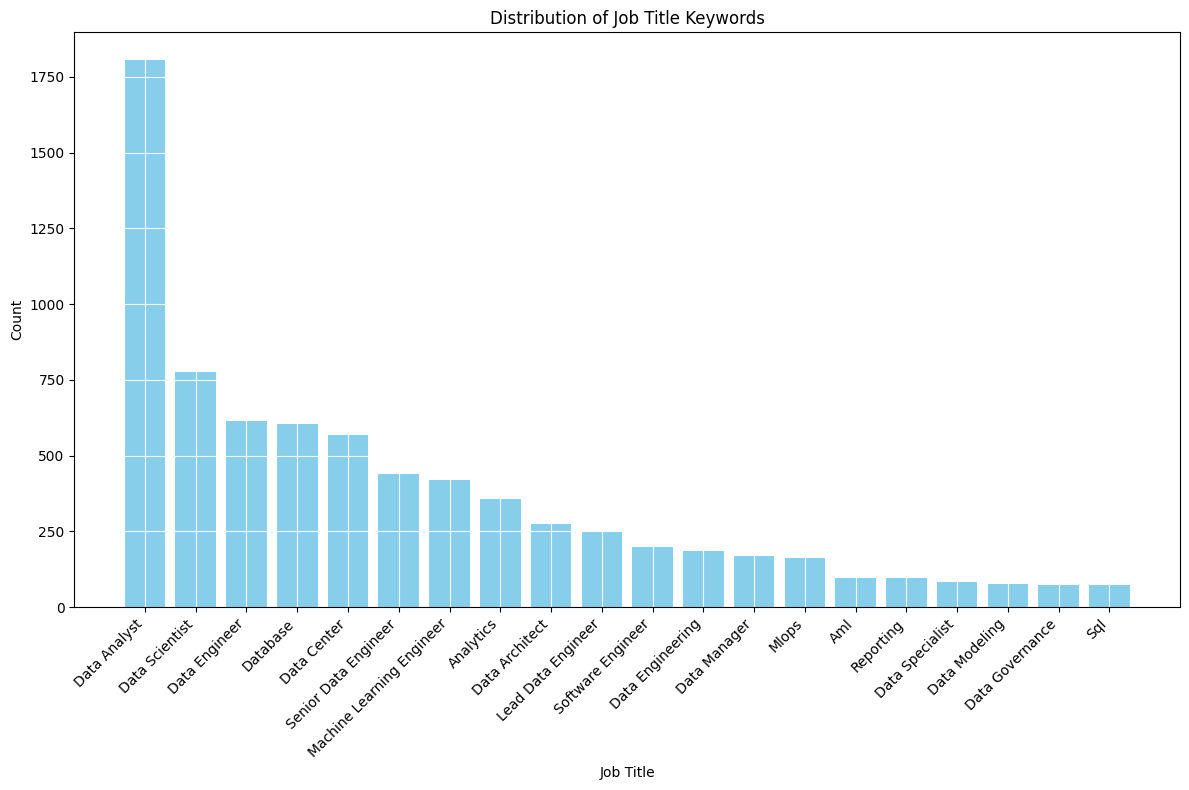

In [13]:
# remove unclassified counts
filtered_counts = technical_job_counts[technical_job_counts.index != 'unclassified']

# limit to top 20
filtered_counts = filtered_counts.head(20)

# Create the column histogram
plt.figure(figsize=(12, 8))
plt.bar(filtered_counts.index, filtered_counts['count'], color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Distribution of Job Title Keywords')
plt.xticks(rotation=45, ha='right')
plt.grid(True, color='white')

# save figure
plt.savefig('../../../../resources/eda_1.1_keyword_frequency_distribution_bar.png')

plt.tight_layout()
plt.show()

### Category Matching Breakdown 

In [14]:
# count the number of occurrences of each job classification
job_classification_counts = pd.DataFrame(technical_job_classifications['job_classification'].value_counts()).reset_index().set_index('job_classification')

# display the counts
display(job_classification_counts)

,count
job_classification,
unclassified,3088
Data Analyst,2415
Data Scientist,815
Data Engineer,812
Database Engineer,766
Senior Data Engineer,751
Data Center Engineer,664
Machine Learning Engineer,499
Data Architect,430


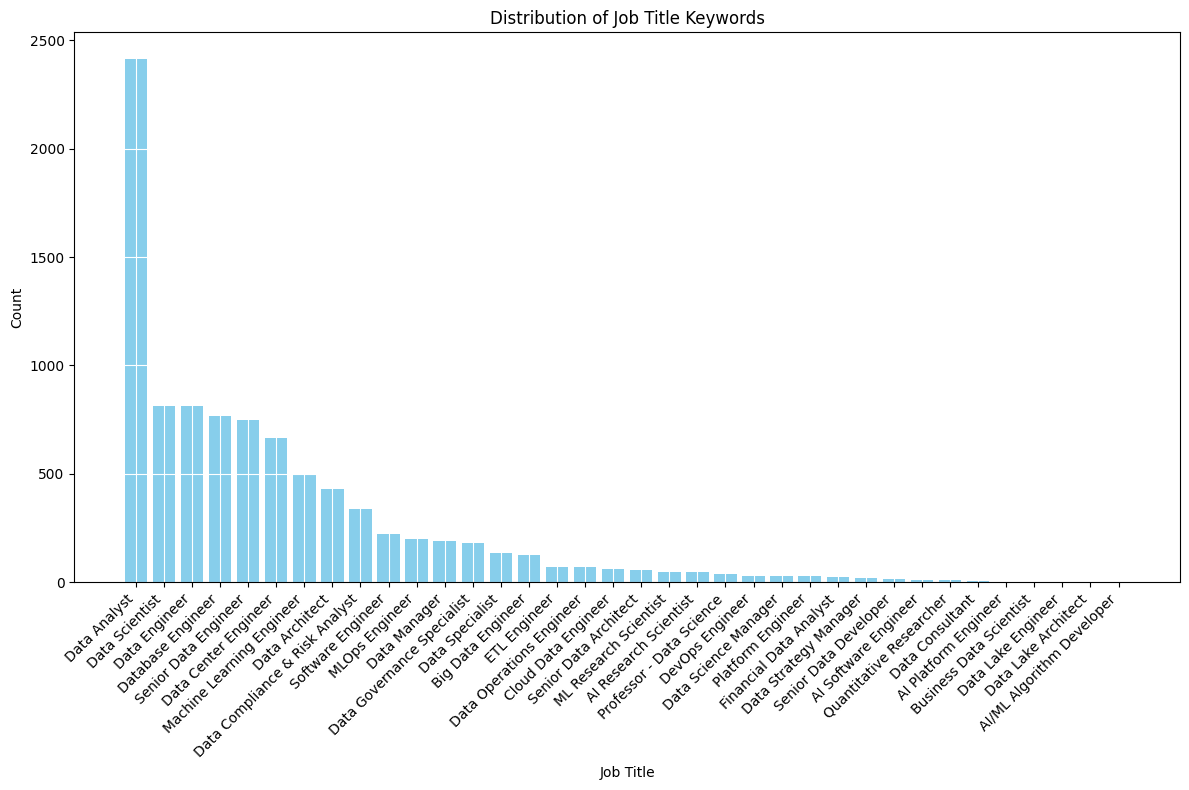

In [15]:
# remove unclassified counts
job_classification_counts = job_classification_counts[job_classification_counts.index != 'unclassified']

# create a column histogram
plt.figure(figsize=(12, 8))
plt.bar(job_classification_counts.index, job_classification_counts['count'], color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Distribution of Job Title Keywords')
plt.xticks(rotation=45, ha='right')
plt.grid(True, color='white')

# save figure
plt.savefig('../../../../resources/eda_1.1_job_classification_distribution_bar.png')

plt.tight_layout()
plt.show()


### **Reflection: Refining Scope for the Minimum Viable Product**  

After further discussions with the team and reviewing the **current keyword categorization results**, it became clear that while this does prove to be the basic framework we need to standardize the job titles, **the results are still largely messy, and many positions remain largely underrepresented**. This is due to several factors:  
- Some roles suffer from **job scarcity**, where even with **one year of historical data**, there simply aren’t enough listings to extract meaningful insights.  
- Other roles have **highly unique, complex, or overly descriptive job titles**, making them difficult to standardize with a simple **regex-based approach**. These roles would likely require **a more advanced methodology to fully capture variations**, which is beyond our current scope.  

Given our project’s timeline, we’ve decided to **limit the scope for the Minimum Viable Product (MVP)** to **the most general and representative technical data science job titles**. The reasoning behind this decision is that:  
- **Highly specialized roles do not have enough data points** to support useful visualizations.  
- **Many job titles are still not fully standardized**, and refining them further would require **significantly more time than we currently have**.  
- **Generalized technical job roles provide the best balance** between data availability and actionable insights.  

With this refined approach, our focus will be on **technical data science roles that, after collecting all variations and experience levels, have at least 50–100 job listings**. This will ensure that our **visualizations for each job title  will remain meaningful and reliable**, while still allowing us to **deliver a structured and functional MVP within our current given time constraints**.  

Moving forward, I will be refining our categorization efforts within a set of selected job titles from the currently matched key, ensuring **better standardization and cleaner mappings** before transitioning to the visualization stage.
